In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-assign/ML Assignment Dataset - Train.csv


In [2]:
df = pd.read_csv("/kaggle/input/dataset-assign/ML Assignment Dataset - Train.csv")

In [3]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
print("Basic Information:")
print(df.info())



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8588 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8589 non-null   object
dtypes: object(3)
memory usage: 201.4+ KB
None


In [5]:
# Summary Statistics
print("\nSummary Statistics:")
df.describe()




Summary Statistics:


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8588,3291,8589
unique,8561,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [6]:
# Missing Values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


tweet_text                                               1
emotion_in_tweet_is_directed_at                       5298
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

In [8]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9
Name: count, dtype: int64

This shows uneven distribution of classes,which mean s our data is highly unbalanced

In [20]:
grouped_df = df.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product'])['is_there_an_emotion_directed_at_a_brand_or_product'].agg(count='count').reset_index()
grouped_df.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,count
0,Android,Negative emotion,8
1,Android,No emotion toward brand or product,1
2,Android,Positive emotion,69
3,Android App,Negative emotion,8
4,Android App,No emotion toward brand or product,1


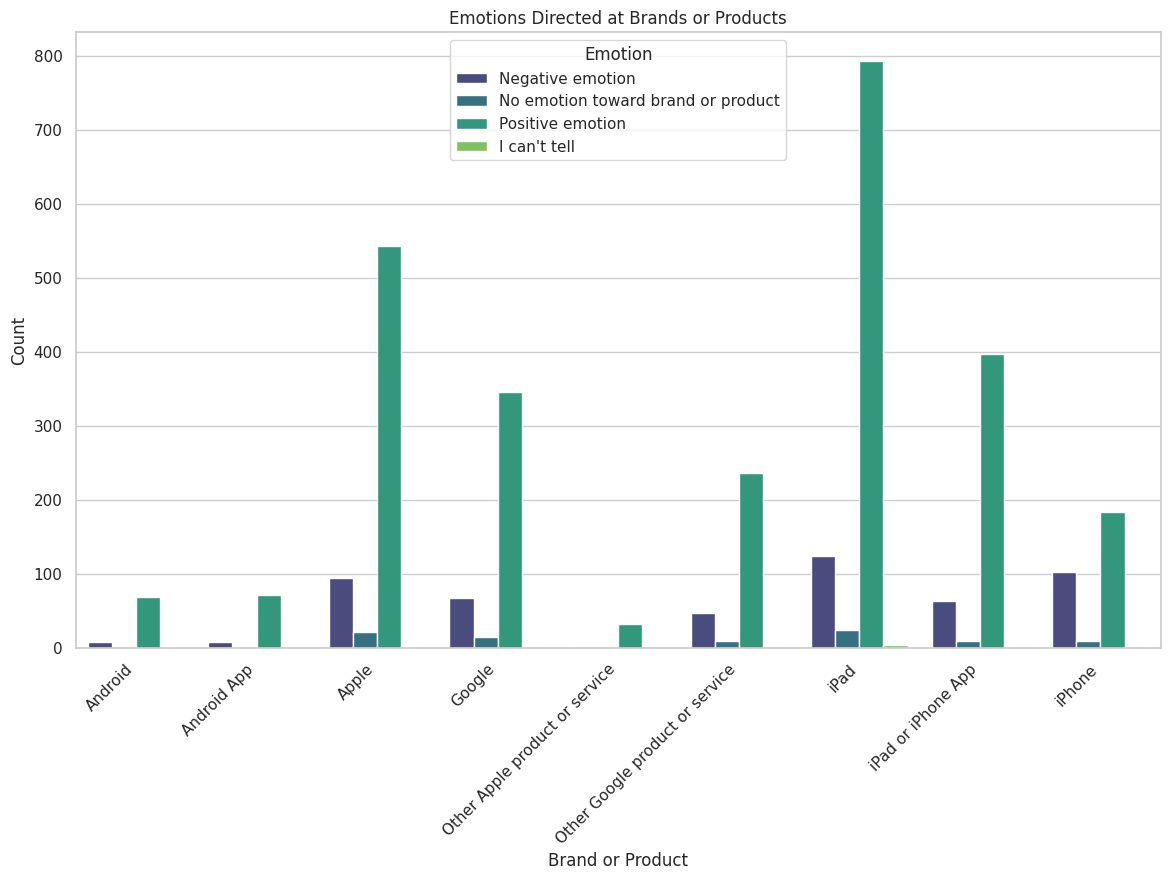

In [21]:



# Create a stacked bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='emotion_in_tweet_is_directed_at', y='count', hue='is_there_an_emotion_directed_at_a_brand_or_product',
            data=grouped_df, palette='viridis')

# Beautify the plot
plt.title('Emotions Directed at Brands or Products')
plt.xlabel('Brand or Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Emotion')

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


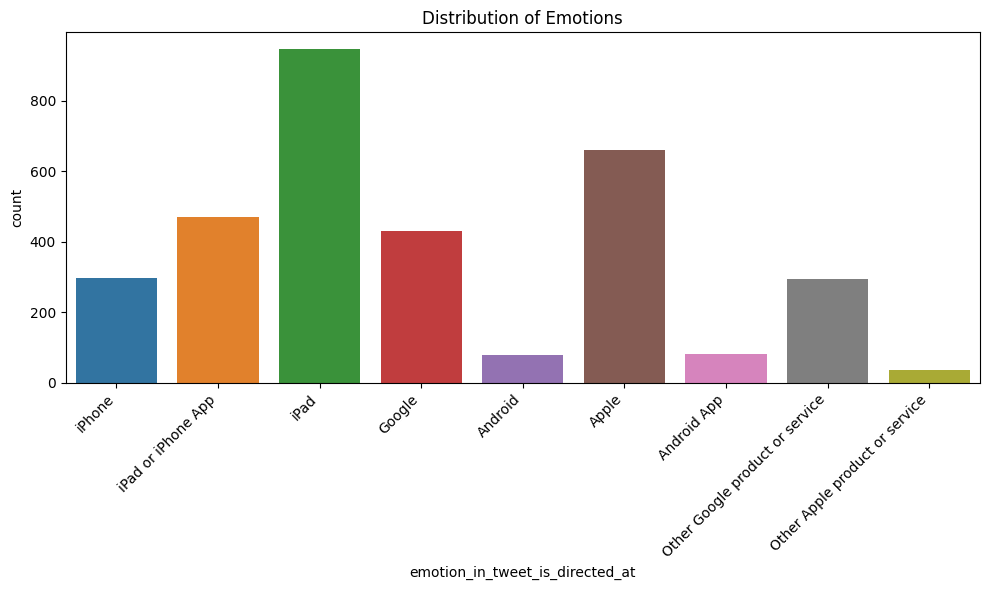

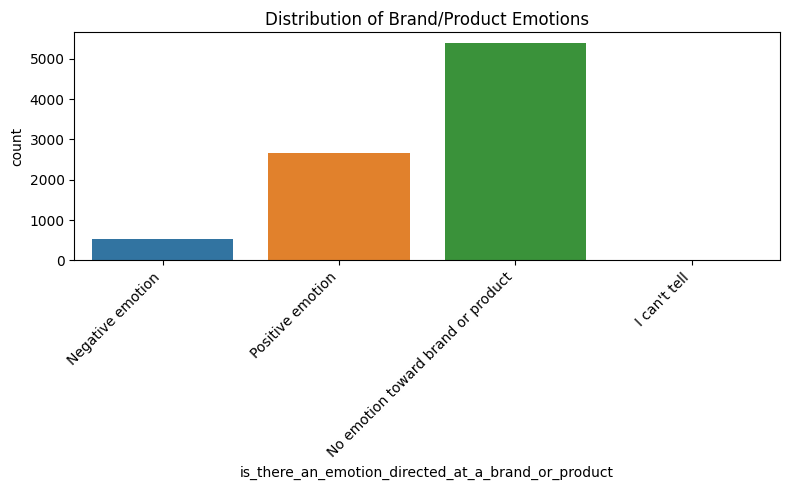

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=df)
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Distribution of Brand/Product Emotions
plt.figure(figsize=(8, 5))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Distribution of Brand/Product Emotions')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Visualization of the data

In [14]:
# Function to clean text
def clean_text(text):
    # Check for NaN values
    if pd.isna(text):
        return pd.NA
    
    # Remove mentions, hashtags, and punctuation
    cleaned_text = ' '.join(word for word in str(text).split() if not (word.startswith('@') or word.startswith('#')))
    cleaned_text = cleaned_text.strip('.,!?;:()[]{}"\'')
    return cleaned_text

df['cleaned_tweet_text'] = df['tweet_text'].apply(clean_text)


In [17]:
df.rename({"is_there_an_emotion_directed_at_a_brand_or_product": "sentiment"}, axis='columns', inplace=True)
df['sentiment'] = df['sentiment'].astype('category')
df['sentiment'] = df['sentiment'].cat.codes
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,sentiment,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,1,@wesley83 I have a 3G iPhone. After 3 hrs twee...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,3,Know about ? Awesome iPad/iPhone app that you'...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,3,Can not wait for 2 also. They should sale them...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,1,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,3,"great stuff on Fri Marissa Mayer (Google), Tim..."


In [38]:
df['sentiment'].value_counts()

sentiment
2    5389
3    2672
1     519
0       9
Name: count, dtype: int64

No emotion toward brand or product    5389
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9

In [ ]:
emotion_dict = { 0: "I can't tell",
                1: "Negative emotion",
                2 : 'No emotion toward brand or product',
                3: "Positive emotion",
               }

In [18]:
### dropping null vales where tweet_text are nan
df_filtered = df.dropna(subset=['tweet_text'], inplace=False)

### Model Fine tuning

##### Base model

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
import torch
from tqdm import tqdm

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)  



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:

train_df, test_df = train_test_split(df_filtered, test_size=0.2, random_state=42)


# Tokenize the tweets
def tokenize_tweets(tokenizer, tweets, max_length):
    return tokenizer(tweets.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors='pt')

max_length = 128  
train_data = tokenize_tweets(tokenizer, train_df['cleaned_tweet_text'], max_length)
test_data = tokenize_tweets(tokenizer, test_df['cleaned_tweet_text'], max_length)




In [21]:

# Create DataLoader for training and testing
train_dataset = TensorDataset(train_data['input_ids'], train_data['attention_mask'], torch.tensor(train_df['sentiment'].values))
test_dataset = TensorDataset(test_data['input_ids'], test_data['attention_mask'], torch.tensor(test_df['sentiment'].values))

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [22]:

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [23]:

# Set up optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 3  
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels.long())
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {average_loss}')


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/3: 100%|██████████| 430/430 [00:45<00:00,  9.52it/s]


Epoch 1/3, Average Training Loss: 0.7177899093128914


Epoch 2/3: 100%|██████████| 430/430 [00:43<00:00,  9.99it/s]


Epoch 2/3, Average Training Loss: 0.5033084243882534


Epoch 3/3: 100%|██████████| 430/430 [00:43<00:00,  9.97it/s]

Epoch 3/3, Average Training Loss: 0.3565071127095888


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation loop
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluating'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = np.mean(all_predictions == all_labels)
print(f'Test Accuracy: {accuracy}')

# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=['class 0', 'class 1', 'class 2', 'class 3'])
print('Classification Report:\n', report)

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:\n', conf_matrix)


Evaluating: 100%|██████████| 108/108 [00:02<00:00, 36.19it/s]

Test Accuracy: 0.7648428405122235
Classification Report:
               precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         1
     class 1       0.54      0.44      0.48        85
     class 2       0.77      0.90      0.83      1072
     class 3       0.77      0.55      0.64       560

    accuracy                           0.76      1718
   macro avg       0.52      0.47      0.49      1718
weighted avg       0.76      0.76      0.75      1718

Confusion Matrix:
 [[  0   0   1   0]
 [  0  37  36  12]
 [  0  24 970  78]
 [  0   8 245 307]]



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Save model and download

In [28]:
# Save the model and tokenizer
model.save_pretrained("twitterSentiment")
tokenizer.save_pretrained("twitterSentiment")


('twitterSentiment/tokenizer_config.json',
 'twitterSentiment/special_tokens_map.json',
 'twitterSentiment/vocab.txt',
 'twitterSentiment/added_tokens.json')

In [30]:
# Load the saved model

# Load the model and tokenizer
model_loaded = BertForSequenceClassification.from_pretrained("twitterSentiment")
tokenizer_loaded = BertTokenizer.from_pretrained("twitterSentiment")


In [34]:
 !zip -r twitterSentiment.zip ./twitterSentiment

  adding: twitterSentiment/ (stored 0%)
  adding: twitterSentiment/config.json (deflated 51%)
  adding: twitterSentiment/model.safetensors (deflated 7%)
  adding: twitterSentiment/special_tokens_map.json (deflated 42%)
  adding: twitterSentiment/tokenizer_config.json (deflated 75%)
  adding: twitterSentiment/vocab.txt (deflated 53%)


### using Data Augmentation

In [25]:

df_filtered.head()

,tweet_text,emotion_in_tweet_is_directed_at,sentiment,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,1,@wesley83 I have a 3G iPhone. After 3 hrs twee...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,3,Know about ? Awesome iPad/iPhone app that you'...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,3,Can not wait for 2 also. They should sale them...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,1,I hope this year's festival isn't as crashy as...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,3,"great stuff on Fri Marissa Mayer (Google), Tim..."


In [26]:
df_filtered['sentiment'].value_counts()

sentiment
2    5388
3    2672
1     519
0       9
Name: count, dtype: int64

In [27]:
#### we will use nlpaug for Text augment

In [41]:
import nltk
from nltk.corpus import wordnet
from random import shuffle
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

True

In [42]:
!python3 -m nltk.downloader wordnet
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpor

In [43]:
! pip install nlpaug


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.1 MB/s eta 0:00:00a 0:00:01


In [44]:
import pandas as pd
import nlpaug.augmenter.word as naw
import random


In [58]:


train_df, test_df = train_test_split(df_filtered, test_size=0.2, random_state=42)
train_df['sentiment'].value_counts()

sentiment
2    4316
3    2112
1     434
0       8
Name: count, dtype: int64

In [59]:


# Identify the lower sentiment classes that you want to augment
lower_sentiment_classes = [1, 0]  

desired_ratio = {0: 0.7, 1: 0.7, 2: 1, 3: 1}

def calculate_augmentation_factor(class_counts, desired_ratio):
    max_count = max(class_counts.values())
    augmentation_factors = {cls: max_count / count * ratio for cls, count, ratio in zip(class_counts.keys(), class_counts.values(), desired_ratio.values())}
    return augmentation_factors

def augment_data_for_class(data, cls, augmentation_factor):
    augmented_data = []
    for _, row in data[data['sentiment'] == cls].iterrows():
        tweet_text = row['tweet_text']
        emotion = row['emotion_in_tweet_is_directed_at']
        sentiment = row['sentiment']

        # Applying augmentation based on the calculated factor
        for _ in range(int(augmentation_factor)):
            augmented_text = text_augmentation(tweet_text)

            # Appending the augmented example
            augmented_data.append({'tweet_text': augmented_text[0], 'emotion_in_tweet_is_directed_at': emotion, 'sentiment': sentiment})

    return augmented_data

def text_augmentation(text):
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_text = aug.augment(text)
    return augmented_text

# Calculate the augmentation factor for each class
class_counts = train_df['sentiment'].value_counts().to_dict()
augmentation_factors = calculate_augmentation_factor(class_counts, desired_ratio)

# Applying augmentation for each class
augmented_data = []
for cls, factor in augmentation_factors.items():
    augmented_data.extend(augment_data_for_class(train_df, cls, factor))

# Add the original data to the augmented data
augmented_data.extend(train_df.to_dict(orient='records'))

# Creating a new dataframe with augmented data
augmented_df = pd.DataFrame(augmented_data)


In [60]:
augmented_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,sentiment,cleaned_tweet_text
0,IPAD FOUND! !! My champion Jeff get it! !! ! #...,iPad,3,NaN
1,All Packed. A few too many # Orchard apple tre...,Apple,3,NaN
2,RT @ mention Just deliver the goods an iPad de...,iPad,3,NaN
3,Iodine & lt; 3 Malus pumila! RT @ mention Appl...,iPad,3,NaN
4,Headline: & quot; # iPad 2 is the Must - Give ...,iPad,3,NaN


In [61]:
augmented_df['sentiment'].value_counts()

sentiment
1    4340
0    4320
2    4316
3    4224
Name: count, dtype: int64

In [62]:
augmented_df['tweet_text'].isna().sum()

0

In [63]:
train_df = augmented_df.copy()
train_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,sentiment,cleaned_tweet_text
0,IPAD FOUND! !! My champion Jeff get it! !! ! #...,iPad,3,NaN
1,All Packed. A few too many # Orchard apple tre...,Apple,3,NaN
2,RT @ mention Just deliver the goods an iPad de...,iPad,3,NaN
3,Iodine & lt; 3 Malus pumila! RT @ mention Appl...,iPad,3,NaN
4,Headline: & quot; # iPad 2 is the Must - Give ...,iPad,3,NaN


(1718, 4)

In [64]:


# Tokenize the tweets
def tokenize_tweets(tokenizer, tweets, max_length):
    return tokenizer(tweets.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors='pt')

max_length = 200
train_data = tokenize_tweets(tokenizer, train_df['tweet_text'], max_length)
test_data = tokenize_tweets(tokenizer, test_df['tweet_text'], max_length)




In [69]:

# Create DataLoader for training and testing
train_dataset = TensorDataset(train_data['input_ids'], train_data['attention_mask'], torch.tensor(train_df['sentiment'].values))
test_dataset = TensorDataset(test_data['input_ids'], test_data['attention_mask'], torch.tensor(test_df['sentiment'].values))

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# Set up optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 10  
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels.long())
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {average_loss}')

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/10: 100%|██████████| 538/538 [01:50<00:00,  4.88it/s]


Epoch 1/10, Average Training Loss: 0.03680497899486642


Epoch 2/10: 100%|██████████| 538/538 [01:50<00:00,  4.88it/s]


Epoch 2/10, Average Training Loss: 0.024035667648249423


Epoch 3/10: 100%|██████████| 538/538 [01:50<00:00,  4.88it/s]


Epoch 3/10, Average Training Loss: 0.019969850420461947


Epoch 4/10: 100%|██████████| 538/538 [01:50<00:00,  4.88it/s]


Epoch 4/10, Average Training Loss: 0.01890318122705173


Epoch 5/10: 100%|██████████| 538/538 [01:50<00:00,  4.88it/s]


Epoch 5/10, Average Training Loss: 0.017641800781544238


Epoch 6/10: 100%|██████████| 538/538 [01:50<00:00,  4.88it/s]


Epoch 6/10, Average Training Loss: 0.019855173804446038


Epoch 7/10: 100%|██████████| 538/538 [01:50<00:00,  4.88it/s]


Epoch 7/10, Average Training Loss: 0.013298770581691467


Epoch 8/10: 100%|██████████| 538/538 [01:49<00:00,  4.90it/s]


Epoch 8/10, Average Training Loss: 0.012633888866740701


Epoch 9/10: 100%|██████████| 538/538 [01:49<00:00,  4.91it/s]


Epoch 9/10, Average Training Loss: 0.013657295750445953


Epoch 10/10:  50%|█████     | 271/538 [00:55<00:54,  4.91it/s]

In [ ]:
# Evaluation loop
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Evaluating'):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert predictions and labels to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = np.mean(all_predictions == all_labels)
print(f'Test Accuracy: {accuracy}')

# Generate classification report
report = classification_report(all_labels, all_predictions, target_names=['class 0', 'class 1', 'class 2', 'class 3'])
print('Classification Report:\n', report)

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:\n', conf_matrix)


#### With class weight

In [32]:
df_filtered['sentiment'].value_counts()

sentiment
2    5388
3    2672
1     519
0       9
Name: count, dtype: int64

In [55]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = torch.tensor(compute_class_weight('balanced', classes=[0, 1, 2,3], y=df_filtered['sentiment']))
class_weights /= class_weights.sum()  # Normalize to ensure the sum is 1

print("Class Weights:", class_weights)

Class Weights: tensor([0.9781, 0.0170, 0.0016, 0.0033], dtype=torch.float64)


In [56]:

train_df, test_df = train_test_split(df_filtered, test_size=0.2, random_state=42)

# Tokenize and preprocess the text data
def preprocess_text(text):
    tokens = tokenizer.encode(text, add_special_tokens=True)
    return tokens

# Apply the preprocessing to the train and test sets
train_tokens = train_df['tweet_text'].apply(preprocess_text)
test_tokens = test_df['tweet_text'].apply(preprocess_text)




max_len = max(max(map(len, train_tokens)), max(map(len, test_tokens)))
train_tokens = [t + [0] * (max_len - len(t)) for t in train_tokens]
test_tokens = [t + [0] * (max_len - len(t)) for t in test_tokens]


# Convert to PyTorch tensors
train_inputs = torch.tensor(train_tokens)
train_labels = torch.tensor(train_df['sentiment'].values)  
test_inputs = torch.tensor(test_tokens)
test_labels = torch.tensor(test_df['sentiment'].values)  
# Create DataLoader for efficient training
train_dataset = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)




In [57]:

# Set up training parameters
optimizer = AdamW(model.parameters(), lr=2e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#class_weights = class_weights.to(device)
class_weights = class_weights.to(torch.float32).to(device)
# Define loss function with class weights
loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)

# Train the model
model.to(device)
model.train()

epochs = 5
for epoch in range(epochs):
    total_loss = 0.0  # Initialize total loss for the epoch
    num_batches = 0

    for inputs, labels in tqdm(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        logits = outputs.logits
        logits =  logits.to(torch.float32)
        # Assuming you have class_weights tensor
        

        loss = loss_fct(logits, labels.long())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        num_batches += 1

    # Calculate average loss for the epoch
    average_loss = total_loss / num_batches

    print(f'Epoch {epoch + 1}, Average Loss: {average_loss}')


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|██████████| 859/859 [00:59<00:00, 14.38it/s]


Epoch 1, Average Loss: 0.21498180225077362


100%|██████████| 859/859 [00:59<00:00, 14.46it/s]


Epoch 2, Average Loss: 0.16755661479662562


100%|██████████| 859/859 [00:59<00:00, 14.52it/s]


Epoch 3, Average Loss: 0.1315407239109911


100%|██████████| 859/859 [00:59<00:00, 14.48it/s]


Epoch 4, Average Loss: 0.11392815587245257


100%|██████████| 859/859 [00:59<00:00, 14.48it/s]

Epoch 5, Average Loss: 0.10075746896504333


In [59]:
model.eval()
test_inputs_cpu = test_inputs.to(device)
with torch.no_grad():
    logits = model(test_inputs_cpu).logits

# Get predictions
predictions = torch.argmax(logits, dim=1).cpu().numpy()

In [60]:
print(classification_report(test_df['sentiment'].values, predictions))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.41      0.53      0.46        85
           2       0.83      0.75      0.78      1072
           3       0.62      0.71      0.66       560

    accuracy                           0.72      1718
   macro avg       0.46      0.50      0.48      1718
weighted avg       0.74      0.72      0.73      1718



In [ ]:
epochs = 25
for epoch in range(epochs):
    total_loss = 0.0  # Initialize total loss for the epoch
    num_batches = 0

    for inputs, labels in tqdm(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        logits = outputs.logits
        logits =  logits.to(torch.float32)
        # Assuming you have class_weights tensor
        

        loss = loss_fct(logits, labels.long())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        num_batches += 1

    # Calculate average loss for the epoch
    average_loss = total_loss / num_batches

    print(f'Epoch {epoch + 1}, Average Loss: {average_loss}')

100%|██████████| 859/859 [00:58<00:00, 14.61it/s]


Epoch 1, Average Loss: 0.07441425879982737


100%|██████████| 859/859 [00:58<00:00, 14.66it/s]


Epoch 2, Average Loss: 0.06310847586392705


100%|██████████| 859/859 [00:59<00:00, 14.55it/s]


Epoch 3, Average Loss: 0.06869304768964203


100%|██████████| 859/859 [00:58<00:00, 14.57it/s]


Epoch 4, Average Loss: 0.06001875251570903


100%|██████████| 859/859 [00:58<00:00, 14.61it/s]


Epoch 5, Average Loss: 0.0509906042540962


100%|██████████| 859/859 [00:58<00:00, 14.62it/s]


Epoch 6, Average Loss: 0.06398553938571823


100%|██████████| 859/859 [00:58<00:00, 14.68it/s]


Epoch 7, Average Loss: 0.05449457065355709


100%|██████████| 859/859 [00:58<00:00, 14.67it/s]


Epoch 8, Average Loss: 0.036463126810724285


100%|██████████| 859/859 [00:58<00:00, 14.67it/s]


Epoch 9, Average Loss: 0.04223791131798131


100%|██████████| 859/859 [00:58<00:00, 14.66it/s]


Epoch 10, Average Loss: 0.051461241907762405


 88%|████████▊ | 758/859 [00:51<00:06, 14.68it/s]

In [ ]:
1+1